# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 544


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"# YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp =city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country =city_weather["sys"]["country"] # YOUR CODE HERE
        city_date =city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | minas de marcona
Processing Record 3 of Set 1 | borba
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | nova prata
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | macusani
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | yaren
Processing Record 17 of Set 1 | illizi
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | ad dilam
Processing Record 22 of Set 1 | talnakh
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          521
Lat           521
Lng           521
Max Temp      521
Humidity      521
Cloudiness    521
Wind Speed    521
Country       521
Date          521
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,27.83,72,100,4.72,TK,1735827556
1,minas de marcona,-15.2119,-75.1103,18.65,72,99,4.33,PE,1735827558
2,borba,-4.3878,-59.5939,27.03,81,100,1.72,BR,1735827559
3,stanley,54.8680,-1.6985,1.40,74,20,5.14,GB,1735827560
4,port elizabeth,-33.9180,25.5701,25.16,57,0,4.63,ZA,1735827302


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,27.83,72,100,4.72,TK,1735827556
1,minas de marcona,-15.2119,-75.1103,18.65,72,99,4.33,PE,1735827558
2,borba,-4.3878,-59.5939,27.03,81,100,1.72,BR,1735827559
3,stanley,54.8680,-1.6985,1.40,74,20,5.14,GB,1735827560
4,port elizabeth,-33.9180,25.5701,25.16,57,0,4.63,ZA,1735827302


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

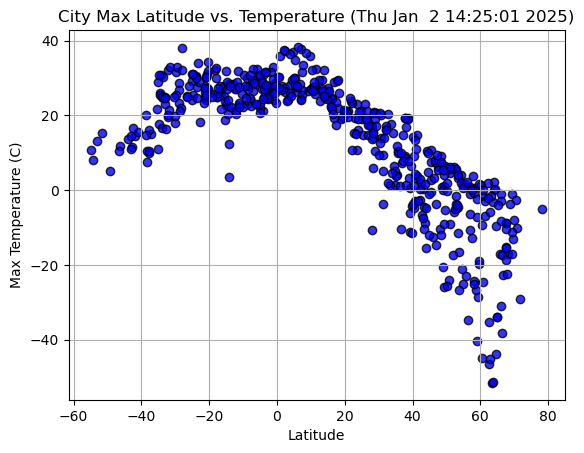

In [24]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = time.strftime("%c")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

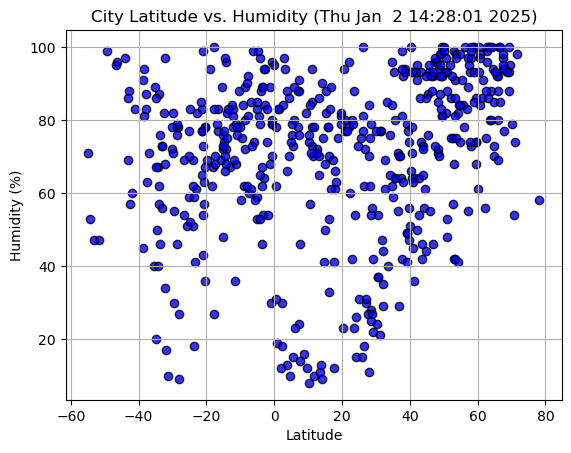

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = time.strftime("%c")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

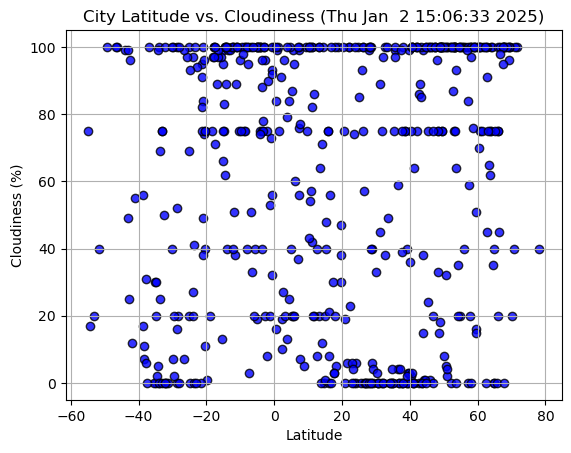

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = time.strftime("%c")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

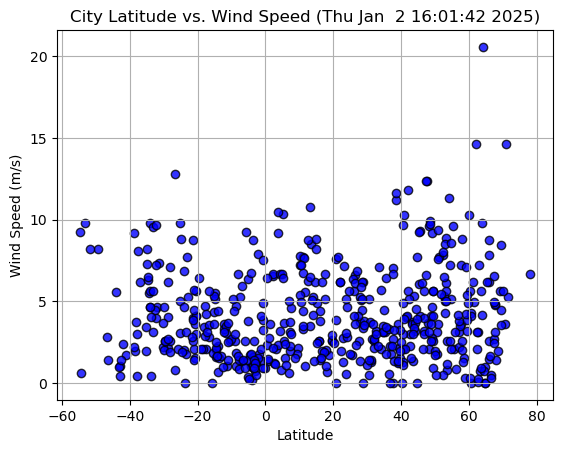

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8)
date = time.strftime("%c")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    plt.scatter(x_values, y_values, edgecolor="black", facecolor="blue", alpha=0.8)

    regress_values = slope * x_values + intercept
    plt.plot(x_values, regress_values, "r-")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    r_squared = r_value**2
    plt.text(min(x_values), min(y_values),
             f"y = {slope:.2f}x + {intercept:.2f}",
            fontsize=10, color="red")
    print("The r2-value is:", r_squared)
    plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,stanley,54.8680,-1.6985,1.40,74,20,5.14,GB,1735827560
6,klyuchi,52.2667,79.1667,-5.73,86,100,7.86,RU,1735827564
10,bethel,41.3712,-73.4140,3.90,64,64,4.02,US,1735827570
11,aykhal,66.0000,111.5000,-31.06,92,20,1.46,RU,1735827571
13,nar'yan-mar,67.6713,53.0870,-8.73,94,100,4.78,RU,1735827574


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,27.83,72,100,4.72,TK,1735827556
1,minas de marcona,-15.2119,-75.1103,18.65,72,99,4.33,PE,1735827558
2,borba,-4.3878,-59.5939,27.03,81,100,1.72,BR,1735827559
4,port elizabeth,-33.9180,25.5701,25.16,57,0,4.63,ZA,1735827302
5,port-aux-francais,-49.3500,70.2167,5.22,99,100,8.18,TF,1735827563


###  Temperature vs. Latitude Linear Regression Plot

The r2-value is: 0.7214851529138447


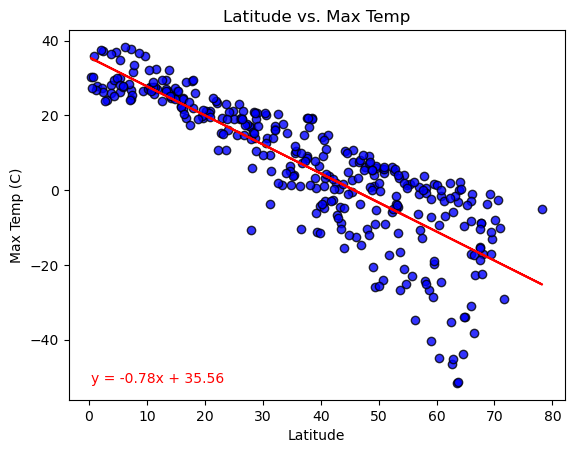

In [63]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temp (C)",
                       "Latitude vs. Max Temp")

The r2-value is: 0.28026719726501303


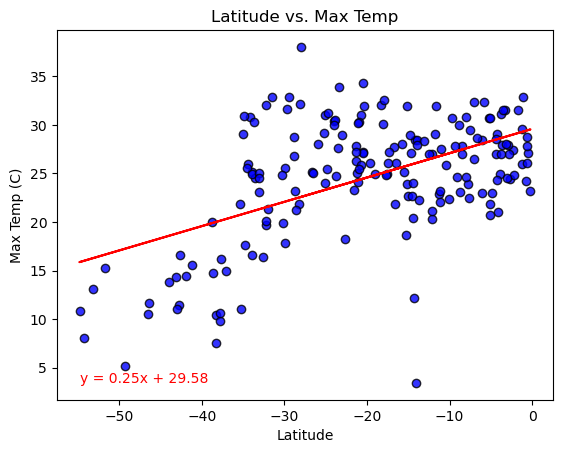

In [61]:
# Linear regression on Southern Hemisphere

# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Latitude",
                       "Max Temp (C)",
                       "Latitude vs. Max Temp")

a strong correlation between the temperature and latitude was seen in the northern hemisphere but there was a weak relationship in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r2-value is: 0.19218536253155255


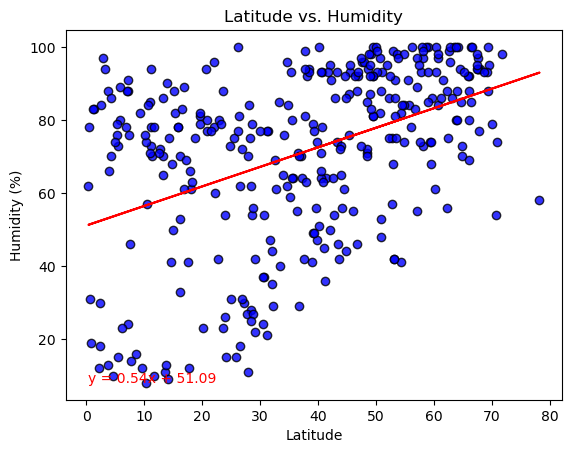

In [59]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                        "Latitude vs. Humidity")

The r2-value is: 0.030772312739602344


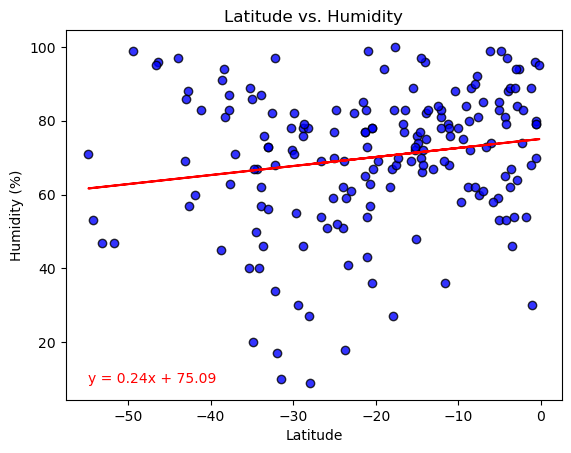

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude",
                       "Humidity (%)",
                        "Latitude vs. Humidity")

with a r2 value of 0.1921 for the nothern hemisphere and  0.03077 for the southern hemisphere it shows that the latitude has minimal effect on the humidity of the weather

### Cloudiness vs. Latitude Linear Regression Plot

The r2-value is: 0.03554686438165559


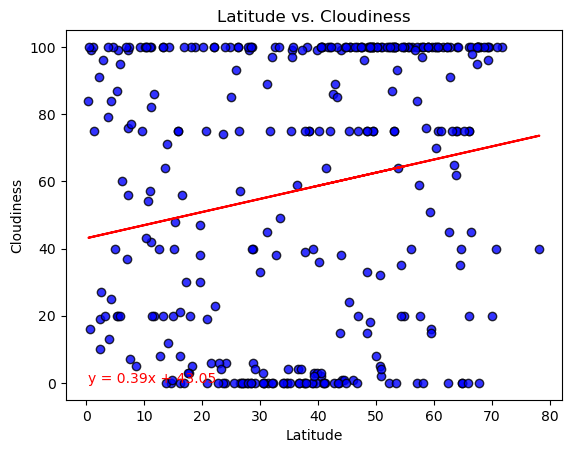

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness",
                        "Latitude vs. Cloudiness")

The r2-value is: 0.12274422782352519


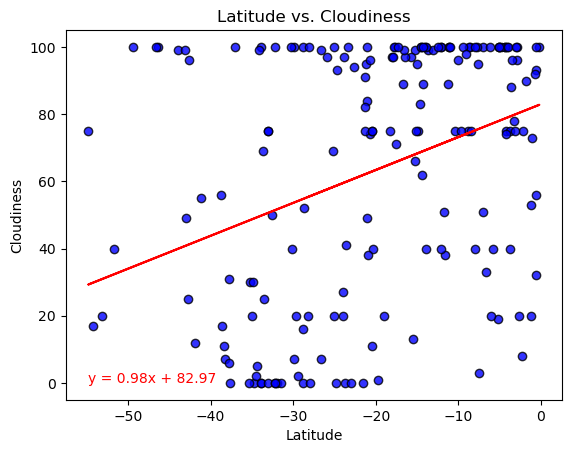

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude",
                       "Cloudiness",
                        "Latitude vs. Cloudiness")

there is a very weak trend between the latitude and cloudiness for both the northern and southern hemisphere,

### Wind Speed vs. Latitude Linear Regression Plot

The r2-value is: 0.004447416531791752


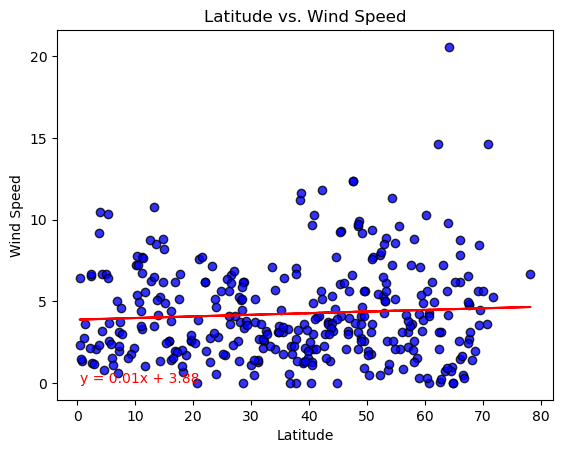

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed",
                        "Latitude vs. Wind Speed")

The r2-value is: 0.08868471506174226


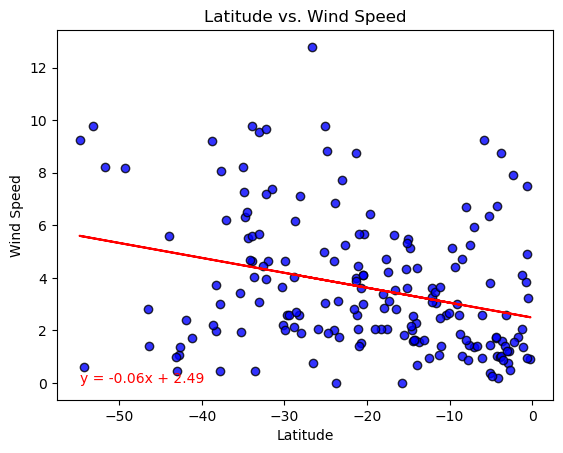

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude",
                       "Wind Speed",
                        "Latitude vs. Wind Speed")

a very weak trend between the latitude and wind speed for both the northern and southern hemisphere,the change in wind speed could be due to some other factors and is not dependant on the latitude